In [45]:
import re
import nltk
import emoji
import numpy as np
from nltk.tokenize import word_tokenize
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def get_dict(data):
    """
    Output:
        word2Ind: returns dictionary mapping the word to its index
        Ind2Word: returns dictionary mapping the index to its word
    """
    words = sorted(list(set(data)))
    n = len(words)
    idx = 0
    word2Ind = {}
    Ind2word = {}
    
    for k in words:
        word2Ind[k] = idx
        Ind2word[idx] = k
        idx += 1
        
    return word2Ind, Ind2word

In [3]:
def process(corpus):
    
    corpus = re.sub(r'[,!?;-]+', '.', corpus)
    corpus = nltk.word_tokenize(corpus)
    corpus = [w.lower() for w in corpus]
    
    return corpus

In [4]:
def get_windows(words,C):
    
    i = C
    
    while i < len(words) - C:
        center_word = words[i]
        context_words = words[(i-C):i] + words[(i+1):(i+1+C)]
        
        yield center_word, context_words
        i += 1
        
def word_to_one_hot_vector(word, word2Ind, V):
    
    one_hot_vector = np.zeros(V)
    one_hot_vector[word2Ind[word]] = 1
    
    return one_hot_vector

def context_words_to_vector(context_words, word2Ind, V):
    
    context_words_vectors = [word_to_one_hot_vector(w, word2Ind, V) for w in context_words]
    context_words_vectors = np.mean(context_words_vectors, axis=0)
    
    return context_words_vectors

In [5]:
with open('shakespeare.txt') as f:
    data = f.read()

In [6]:
data = process(data)

In [7]:
print("There are" ,len(data), "words in the dataset")

There are 63557 words in the dataset


Get frequency for each word

In [8]:
fdist = nltk.FreqDist(word for word in data)

In [9]:
fdist

FreqDist({'.': 9630, 'the': 1521, 'and': 1394, 'i': 1257, 'to': 1159, 'of': 1093, 'my': 857, 'that': 781, 'in': 770, 'a': 752, ...})

Create index for each word

In [10]:
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
print("Size of vocabulary: ", V)

Size of vocabulary:  6371


In [11]:
c_words = []
context_words = []

for c_w, context_w in get_windows(data[:5000],2):
    c_words.append(c_w)
    context_words.append(context_w)

In [12]:
c_words_vector = word_to_one_hot_vector(c_words[0],word2Ind,V)
i = 0
for c_w in c_words[1:]:
    if i%500 == 0:
        print(i)
    i += 1
    c_words_vector = np.vstack((c_words_vector, word_to_one_hot_vector(c_w,word2Ind,V)))

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [13]:
context_words_vector = context_words_to_vector(context_words[0],word2Ind,V)
i = 0
for context_w in context_words[1:]:
    if i%500 == 0:
        print(i)
    i += 1
    context_words_vector = np.vstack((context_words_vector, context_words_to_vector(context_w,word2Ind,V)))

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [14]:
matrix = pd.DataFrame(columns = ["Center word","Context words","Context vector","Word vector"])
matrix["Center word"] = c_words
matrix["Context words"] = context_words
matrix["Context vector"] = context_words_vector
matrix["Word vector"] = c_words_vector

In [15]:
matrix["Context vector"] = matrix["Context vector"].astype(object)
matrix["Word vector"] = matrix["Word vector"].astype(object)

for i in range(len(c_words)):
    matrix["Context vector"][i] = context_words_vector[i]
    matrix["Word vector"][i] = c_words_vector[i]

In [16]:
matrix

,Center word,Context words,Context vector,Word vector
0,a,"[o, for, muse, of]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,muse,"[for, a, of, fire]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,of,"[a, muse, fire, .]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,fire,"[muse, of, ., that]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,.,"[of, fire, that, would]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...
4991,in,"[and, all, war, with]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4992,war,"[all, in, with, time]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4993,with,"[in, war, time, for]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4994,time,"[war, with, for, love]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


    The vector X will be the context words vector, and the label Y the word vector.
    The hidden layer neuron weights are the embedding values for each word

In [31]:
N = 50
model = keras.Sequential()
model.add(keras.layers.Dense(N,activation="relu",input_shape=(6371,)))
model.add(keras.layers.Dense(6371,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                318600    
_________________________________________________________________
dense_7 (Dense)              (None, 6371)              324921    
Total params: 643,521
Trainable params: 643,521
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(x = context_words_vector, y = c_words_vector, batch_size=1, epochs=5)

Train on 4996 samples
Epoch 1/5
4996/4996 [==============================] - 29s 6ms/sample - loss: 6.6906 - accuracy: 0.1133
Epoch 2/5
4996/4996 [==============================] - 26s 5ms/sample - loss: 5.8244 - accuracy: 0.1141
Epoch 3/5
4996/4996 [==============================] - 27s 5ms/sample - loss: 5.5691 - accuracy: 0.1141
Epoch 4/5
4996/4996 [==============================] - 27s 5ms/sample - loss: 5.3096 - accuracy: 0.1195
Epoch 5/5
4996/4996 [==============================] - 27s 5ms/sample - loss: 5.0346 - accuracy: 0.1303


In [38]:
neurons_weights = model.get_weights()[0]
embedding = pd.DataFrame(index = Ind2word.values(), data = neurons_weights)

In [81]:
embedding

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
',-0.002797,-0.125872,-0.051267,0.000278,-0.246393,-0.198441,-0.031317,-0.129861,-0.005995,-0.026461,...,0.055330,-0.059392,-0.026764,0.070147,-0.026359,0.023660,0.013219,-0.105551,0.040585,-0.251219
'',0.021303,0.027340,0.011226,-0.026114,-0.012046,0.011970,-0.029422,-0.028441,-0.026767,-0.028130,...,0.025201,-0.003711,0.002647,-0.004048,-0.024559,-0.015485,-0.026980,-0.020295,0.003518,-0.021371
'after,0.024605,-0.009025,-0.023475,0.024066,-0.016474,-0.025982,0.022019,0.006287,0.012208,-0.025217,...,0.002015,0.028351,-0.025916,-0.001299,0.017473,-0.003613,0.008847,-0.014072,-0.005086,0.017028
'agrippa,-0.022188,0.006405,0.004457,0.009550,0.005476,0.025564,0.022134,0.025026,-0.016427,-0.023332,...,-0.024278,0.011165,0.021460,0.007511,-0.004527,-0.026452,0.008314,-0.024222,-0.027805,-0.030553
'among,-0.018193,0.013651,-0.010298,-0.018836,-0.022069,-0.018958,-0.028569,0.022031,-0.017114,0.005176,...,-0.027294,-0.016926,0.021018,0.008642,0.001621,-0.003726,0.016473,-0.003428,-0.015799,-0.016705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yourself,0.000203,0.098526,-0.024501,0.009843,-0.006699,-0.044000,0.211477,-0.019456,-0.041926,0.100803,...,-0.097633,-0.027061,0.043011,-0.082661,-0.057625,0.085134,0.052857,0.026799,-0.064474,-0.006795
yourselves,-0.006743,0.077831,0.038741,0.099715,0.115078,0.030437,0.347510,0.064781,0.109424,0.141419,...,0.282137,-0.050893,0.214145,0.063931,0.198743,0.166175,0.129876,0.134620,0.231655,0.248063
youth,-0.000685,-0.012225,0.054813,-0.018389,0.136421,0.106493,0.133187,0.032833,0.002516,0.246192,...,0.057155,0.228972,0.403452,0.176327,0.164586,0.154797,0.152461,0.120394,0.054942,0.195388
youthful,0.028307,0.188929,0.115141,0.056395,0.051798,0.108896,0.014609,0.167029,0.159138,0.071809,...,0.124271,0.308703,0.180502,0.314971,0.322433,0.169249,0.232650,0.065129,0.258864,0.066509


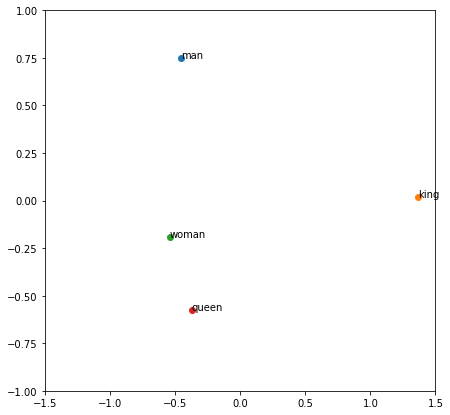

In [95]:
test_words = ["man","king","woman","queen"]
test = embedding.loc[test_words,:]
pca = PCA(n_components=2)
decomposed = pca.fit_transform(test.to_numpy())

f, ax = plt.subplots(figsize=(7,7))

for i in range(len(test_words)):
    ax.scatter(decomposed[i][0],decomposed[i][1])
    ax.annotate(test_words[i],(decomposed[i][0],decomposed[i][1]))

ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1,1])

plt.show()